In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
#import os
from sklearn.metrics import confusion_matrix
import itertools
from keras.datasets import mnist

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train/ 255
x_test  = x_test / 255

In [3]:
#x_train[0]

2

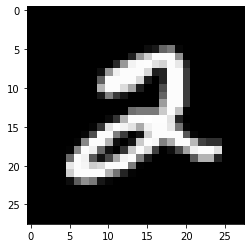

In [4]:
plt.imshow(x_train[5],cmap="gray")
y_train[5]

In [5]:
np.shape(x_train)

(60000, 28, 28)

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2), strides=1, input_shape=(28,28,1),
                          activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(2,2), strides=1, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [7]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
)

In [8]:
len(x_train)

60000

In [9]:
r  = model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=10,batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.2351 - accuracy: 0.9285 - val_loss: 0.0587 - val_accuracy: 0.9820
Epoch 2/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0950 - accuracy: 0.9723 - val_loss: 0.0416 - val_accuracy: 0.9875
Epoch 3/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0708 - accuracy: 0.9795 - val_loss: 0.0369 - val_accuracy: 0.9879
Epoch 4/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0583 - accuracy: 0.9820 - val_loss: 0.0389 - val_accuracy: 0.9875
Epoch 5/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0507 - accuracy: 0.9846 - val_loss: 0.0340 - val_accuracy: 0.9890
Epoch 6/10
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0420 - accuracy: 0.9868 - val_loss: 0.0343 - val_accuracy: 0.9877
Epoch 7/10
1875/1875 [==============================] - 48s 25ms/step - loss: 0.0377 - accuracy: 0.9882 - val_loss: 0.0356 -

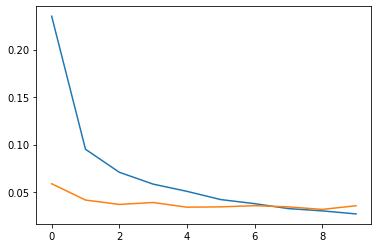

In [10]:
plt.plot(r.history["loss"],label="loss")
plt.plot(r.history["val_loss"],label="val_los")

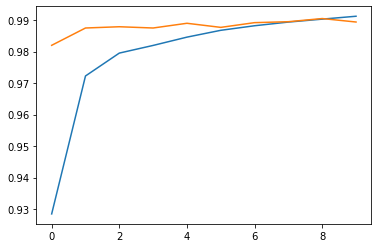

In [11]:
plt.plot(r.history["accuracy"],label="accuracy")
plt.plot(r.history["val_accuracy"],label="val_accuracy")

In [12]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.0355 - accuracy: 0.9894


[0.03553913161158562, 0.9894000291824341]

In [13]:
x_test[17:18].shape

(1, 28, 28)

1/1 [==============================] - 0s 222ms/step


array([0], dtype=int64)

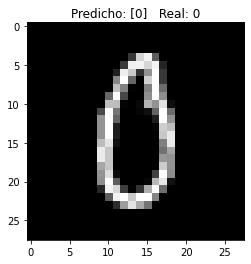

In [14]:
numero = np.random.randint(0,6000)
evaluado = x_test[numero:numero+1]
real = y_test[numero]
predicho = model.predict(evaluado).argmax(axis=1)
plt.imshow(x_test[numero],cmap="gray")
plt.title("Predicho: %s   Real: %s"%(predicho,real))
predicho

In [15]:
y_test[numero]

0

313/313 [==============================] - 4s 11ms/step
Confusion matrix without normalization
[[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1131    1    0    0    0    2    1    0    0]
 [   1    2 1025    0    0    0    0    3    1    0]
 [   0    0    0 1001    0    3    0    3    3    0]
 [   0    0    0    0  968    0    3    0    1   10]
 [   2    0    1    5    0  882    2    0    0    0]
 [   3    1    0    0    1    2  951    0    0    0]
 [   0    2    4    0    0    0    0 1019    1    2]
 [   7    0    2    1    4    3    3    0  950    4]
 [   1    0    0    0    4    7    1    4    3  989]]


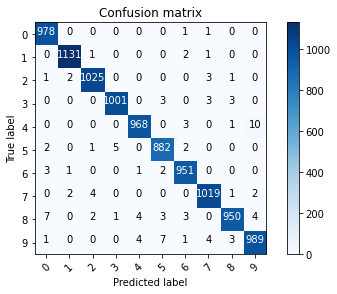

In [16]:
def plot_confusion_matrix(cm,classes,
                         normalize=False,
                         title="Confusion matrix",
                         cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix without normalization")
    print(cm)
    plt.imshow(cm,interpolation="nearest",cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    fmt = "0.2f" if normalize else "d"
    thresh = cm.max()/2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],fmt),
                horizontalalignment="center",
                color="white" if cm[i,j] >  thresh else "black")
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()
    
p_test = model.predict(x_test).argmax(axis=1)
cm  =  confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm, list(range(10)),normalize=False)

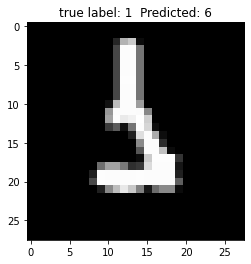

In [17]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap="gray")
plt.title("true label: %s  Predicted: %s" % (y_test[i],p_test[i]));